In [1]:
import sys
import os
import random
import pandas as pd
sys.path.append(os.path.abspath('../scripts'))
sys.path.append(os.path.abspath('../src')) 
from data_loader import DataLoader
import path 
# from eda import EDA

from Data_Visualization import visualizer
from modelling import model_development

In [2]:
folder_path = path.get_path()
data_load = DataLoader(folder_path)
df = data_load.load_txt_data()
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [3]:
df = df.to_csv("../Data/MachineLearningRating_v3.csv", index=False)

In [2]:
df1 = pd.read_csv("../Data/MachineLearningRating_v3.csv", low_memory=False)

# Data Summarization

 ### 1. Data Overview

In [4]:
print("\nFirst 5 rows:")
print(df1.head())


First 5 rows:
   UnderwrittenCoverID  PolicyID TransactionMonth  IsVATRegistered  \
0               145249     12827    3/1/2015 0:00             True   
1               145249     12827    5/1/2015 0:00             True   
2               145249     12827    7/1/2015 0:00             True   
3               145255     12827    5/1/2015 0:00             True   
4               145255     12827    7/1/2015 0:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - Windscree

In [5]:
# #print the infomation of the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [6]:
# Statistical distribution of attribuets
df1.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


In [7]:
# Select numerical columns
num_cols = df1.select_dtypes(include=['number'])
# Compute variability metrics
variability_metrics = pd.DataFrame({
    "Mean": num_cols.mean(),
    "Standard Deviation": num_cols.std(),
    "Variance": num_cols.var(),
    "Range": num_cols.max() - num_cols.min(),
    "IQR": num_cols.quantile(0.75) - num_cols.quantile(0.25)
})

# Display variability statistics
print(variability_metrics)

                                  Mean  Standard Deviation      Variance  \
UnderwrittenCoverID       1.048175e+05        6.329371e+04  4.006094e+09   
PolicyID                  7.956682e+03        5.290039e+03  2.798451e+07   
PostalCode                3.020601e+03        2.649854e+03  7.021728e+06   
mmcode                    5.487770e+07        1.360381e+07  1.850635e+14   
RegistrationYear          2.010225e+03        3.261391e+00  1.063667e+01   
Cylinders                 4.046642e+00        2.940201e-01  8.644783e-02   
cubiccapacity             2.466743e+03        4.428006e+02  1.960724e+05   
kilowatts                 9.720792e+01        1.939326e+01  3.760984e+02   
NumberOfDoors             4.019250e+00        4.683144e-01  2.193184e-01   
CustomValueEstimate       2.255311e+05        5.645157e+05  3.186780e+11   
NumberOfVehiclesInFleet            NaN                 NaN           NaN   
SumInsured                6.041727e+05        1.508332e+06  2.275065e+12   
CalculatedPr

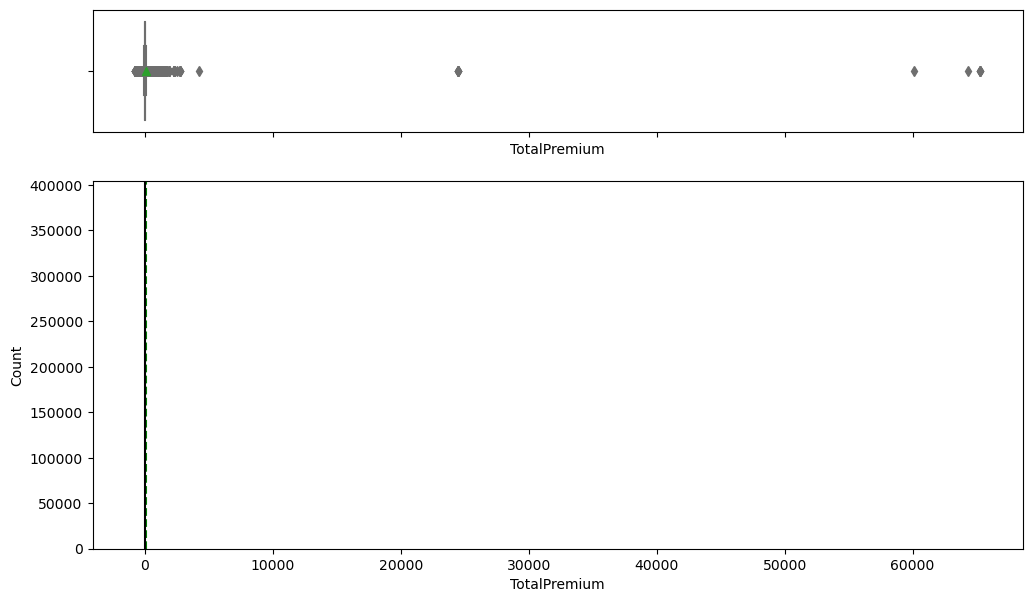

In [3]:
processing = visualizer(df1)

# Numerical variables statistical summary
processing.histogram_boxplot('TotalPremium')

In [51]:
# 5. Categorical Variables Analysis
print("\nCategorical Variables Analysis:")
categorical_columns = df1.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\n{col}:")
    print(df1[col].value_counts())


Categorical Variables Analysis:

TransactionMonth:
TransactionMonth
8/1/2015 0:00     106747
7/1/2015 0:00     104143
6/1/2015 0:00     102594
5/1/2015 0:00      99898
4/1/2015 0:00      96563
3/1/2015 0:00      92015
2/1/2015 0:00      83198
1/1/2015 0:00      71576
12/1/2014 0:00     62457
11/1/2014 0:00     48248
10/1/2014 0:00     33820
9/1/2014 0:00      25990
8/1/2014 0:00      19626
7/1/2014 0:00      14907
6/1/2014 0:00      11822
5/1/2014 0:00       9484
4/1/2014 0:00       6919
3/1/2014 0:00       3466
2/1/2014 0:00       2062
1/1/2014 0:00       1827
12/1/2013 0:00      1495
11/1/2013 0:00      1196
10/1/2013 0:00        45
Name: count, dtype: int64

Citizenship:
Citizenship
      895210
ZA    103721
ZW       936
AF       231
Name: count, dtype: int64

LegalType:
LegalType
Individual           911929
Private company       83891
Close Corporation      2459
Public company         1295
Partnership             331
Sole proprieter         193
Name: count, dtype: int64

Title:
Ti

In [8]:
# Check unique values for categorical variables
categorical_cols = df1.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df1[col].unique()[:10]) 


Column: TransactionMonth
['3/1/2015 0:00' '5/1/2015 0:00' '7/1/2015 0:00' '1/1/2015 0:00'
 '4/1/2015 0:00' '6/1/2015 0:00' '8/1/2015 0:00' '2/1/2015 0:00'
 '12/1/2014 0:00' '11/1/2014 0:00']

Column: Citizenship
['  ' 'AF' 'ZA' 'ZW']

Column: LegalType
['Close Corporation' 'Individual' 'Partnership' 'Private company'
 'Public company' 'Sole proprieter']

Column: Title
['Mr' 'Dr' 'Miss' 'Mrs' 'Ms']

Column: Language
['English']

Column: Bank
['First National Bank' 'Standard Bank' nan 'ABSA Bank' 'Capitec Bank'
 'Nedbank' 'FirstRand Bank' 'Investec Bank' 'Ithala Bank' 'Old Mutual']

Column: AccountType
['Current account' 'Savings account' nan 'Transmission account']

Column: MaritalStatus
['Not specified' 'Married' 'Single' nan]

Column: Gender
['Not specified' 'Male' 'Female' nan]

Column: Country
['South Africa']

Column: Province
['Gauteng' 'KwaZulu-Natal' 'Mpumalanga' 'Eastern Cape' 'Western Cape'
 'Limpopo' 'North West' 'Free State' 'Northern Cape']

Column: MainCrestaZone
['Rand E

## Data Quality Assessment:

In [9]:
# Check missing values
missing_values = df1.isnull().sum()
missing_percentage = (df1.isnull().sum() / len(df1)) * 100

# Display columns with missing values  : missing_percent.map('{:.2f} %'.format)
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage.map('{:.2f}%'.format)})
print(missing_data[missing_data["Missing Values"] > 0])

                         Missing Values Percentage
Bank                             145961     14.59%
AccountType                       40232      4.02%
MaritalStatus                      8259      0.83%
Gender                             9536      0.95%
mmcode                              552      0.06%
VehicleType                         552      0.06%
make                                552      0.06%
Model                               552      0.06%
Cylinders                           552      0.06%
cubiccapacity                       552      0.06%
kilowatts                           552      0.06%
bodytype                            552      0.06%
NumberOfDoors                       552      0.06%
VehicleIntroDate                    552      0.06%
CustomValueEstimate              779642     77.96%
CapitalOutstanding                    2      0.00%
NewVehicle                       153295     15.33%
WrittenOff                       641901     64.18%
Rebuilt                        

## Univariate Analysis:

### Distribution of Variables: Plot histograms for numerical columns and bar charts for categorical columns to understand distributions..

In [4]:
# Call BarPlot Function from Data_Visualiztion sections
categorical_plot = visualizer(df1)

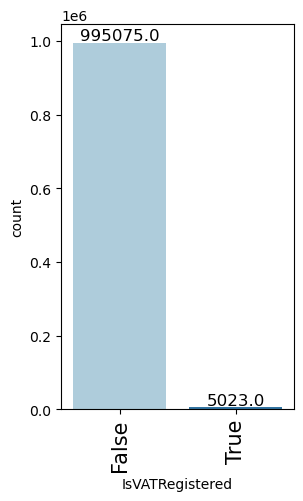

In [5]:
VATRegistered = categorical_plot.labeled_barplot('IsVATRegistered')

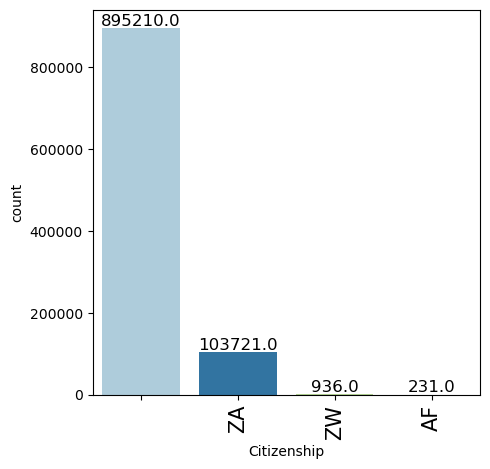

In [6]:
VATRegistered = categorical_plot.labeled_barplot('Citizenship')

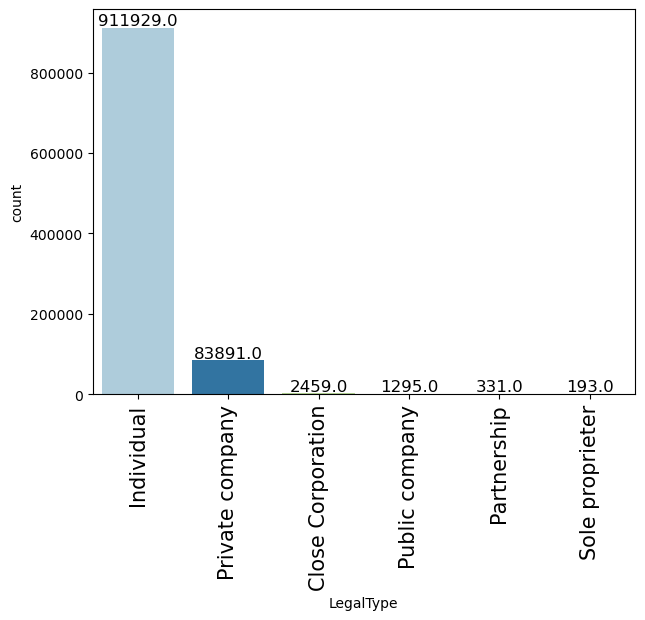

In [7]:
VATRegistered = categorical_plot.labeled_barplot('LegalType')

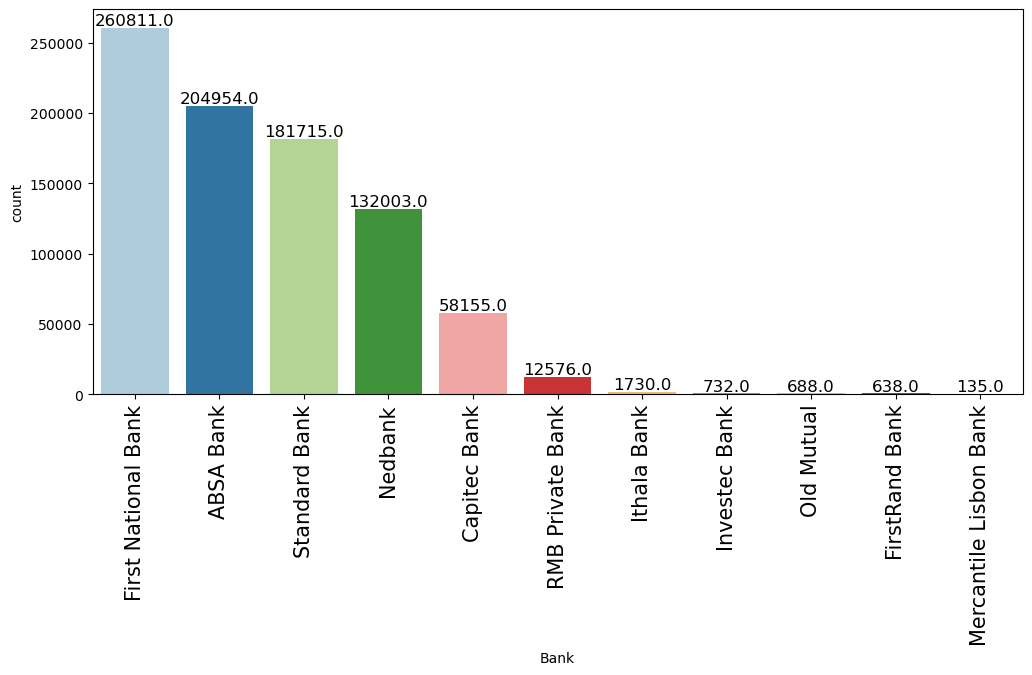

In [8]:
VATRegistered = categorical_plot.labeled_barplot('Bank')

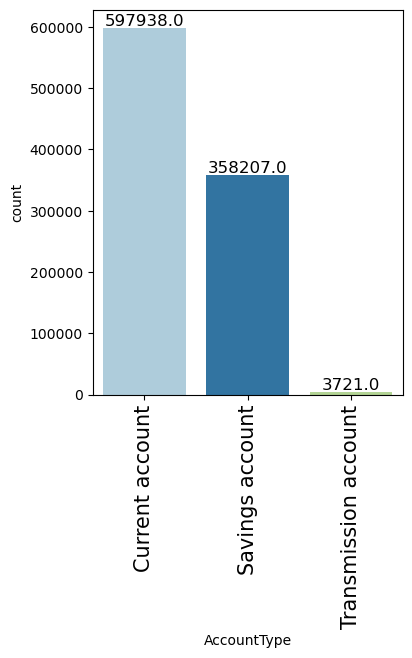

In [9]:
VATRegistered = categorical_plot.labeled_barplot('AccountType')

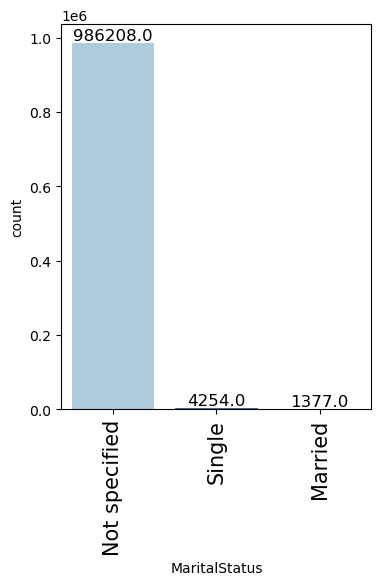

In [10]:
VATRegistered = categorical_plot.labeled_barplot('MaritalStatus')

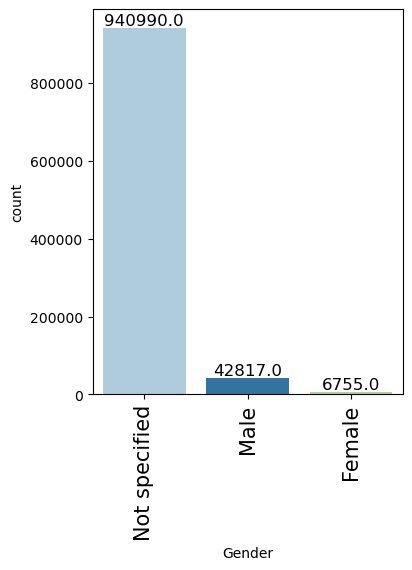

In [11]:
VATRegistered = categorical_plot.labeled_barplot('Gender')

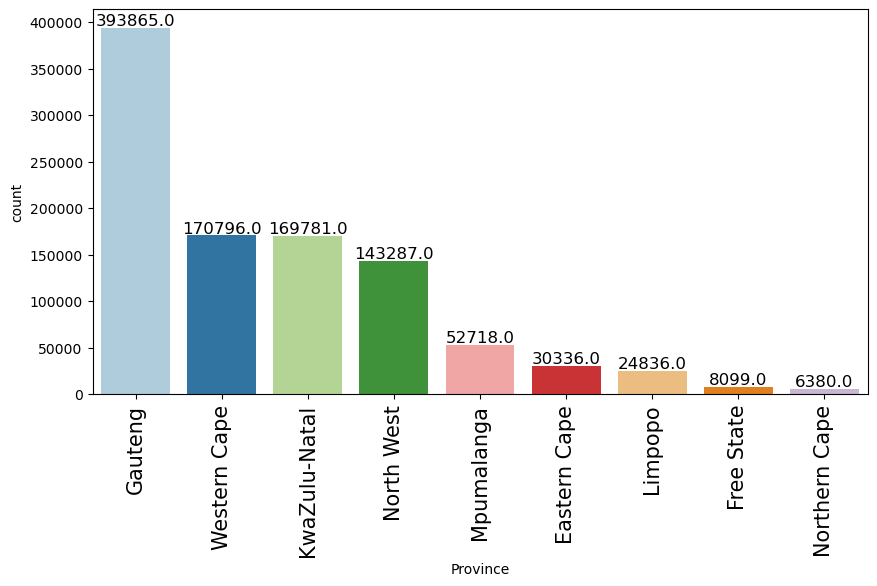

In [12]:
VATRegistered = categorical_plot.labeled_barplot('Province')

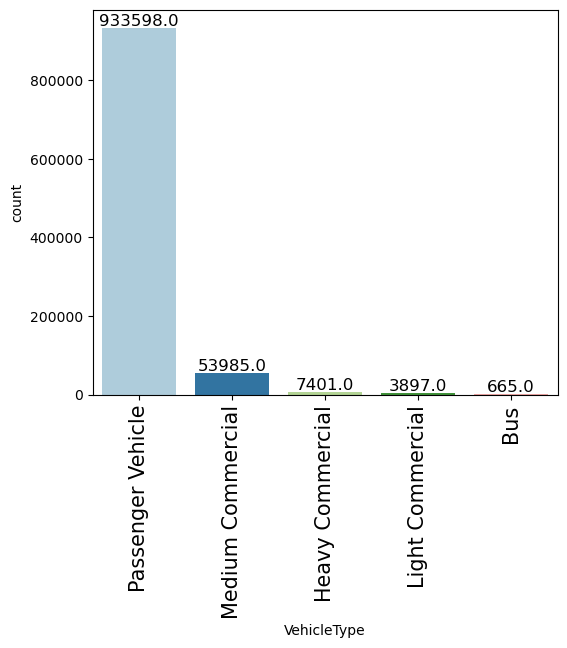

In [13]:
VATRegistered = categorical_plot.labeled_barplot('VehicleType')

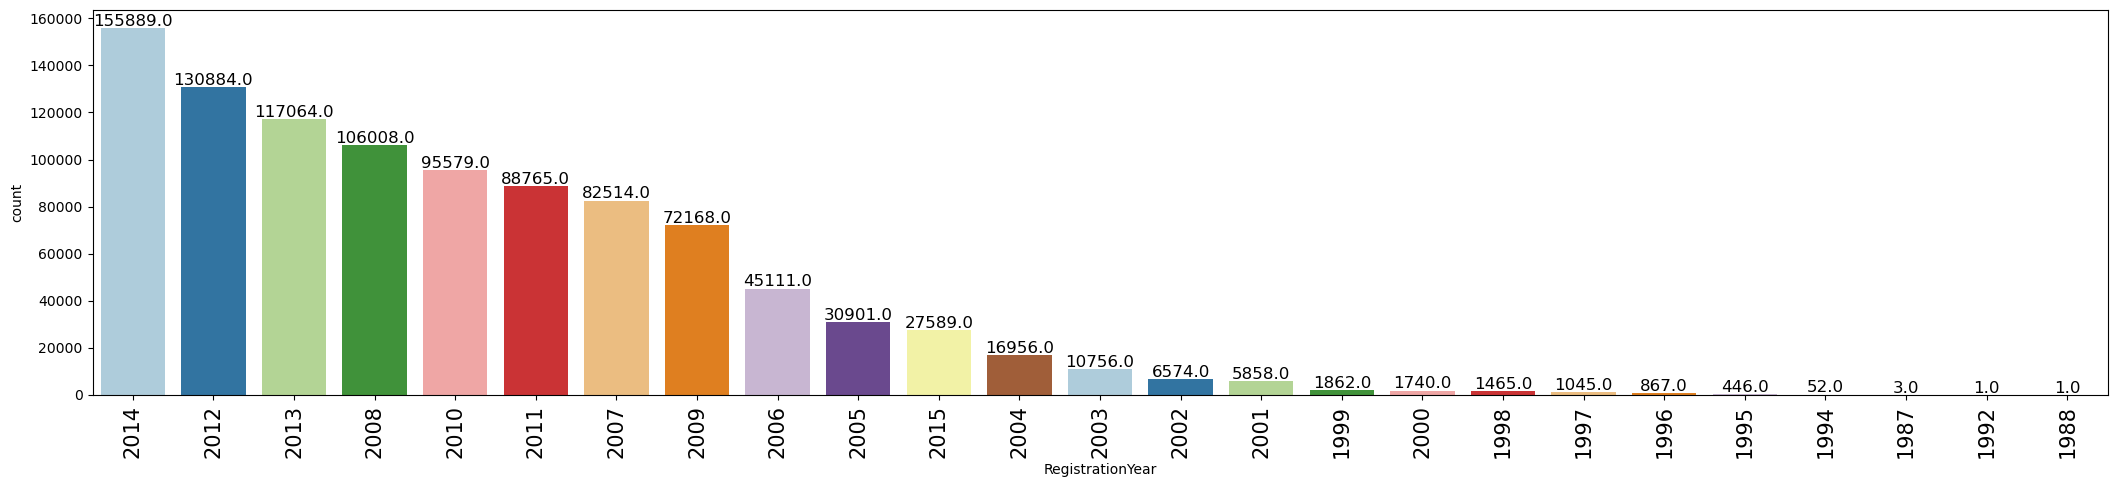

In [14]:
VATRegistered = categorical_plot.labeled_barplot('RegistrationYear')

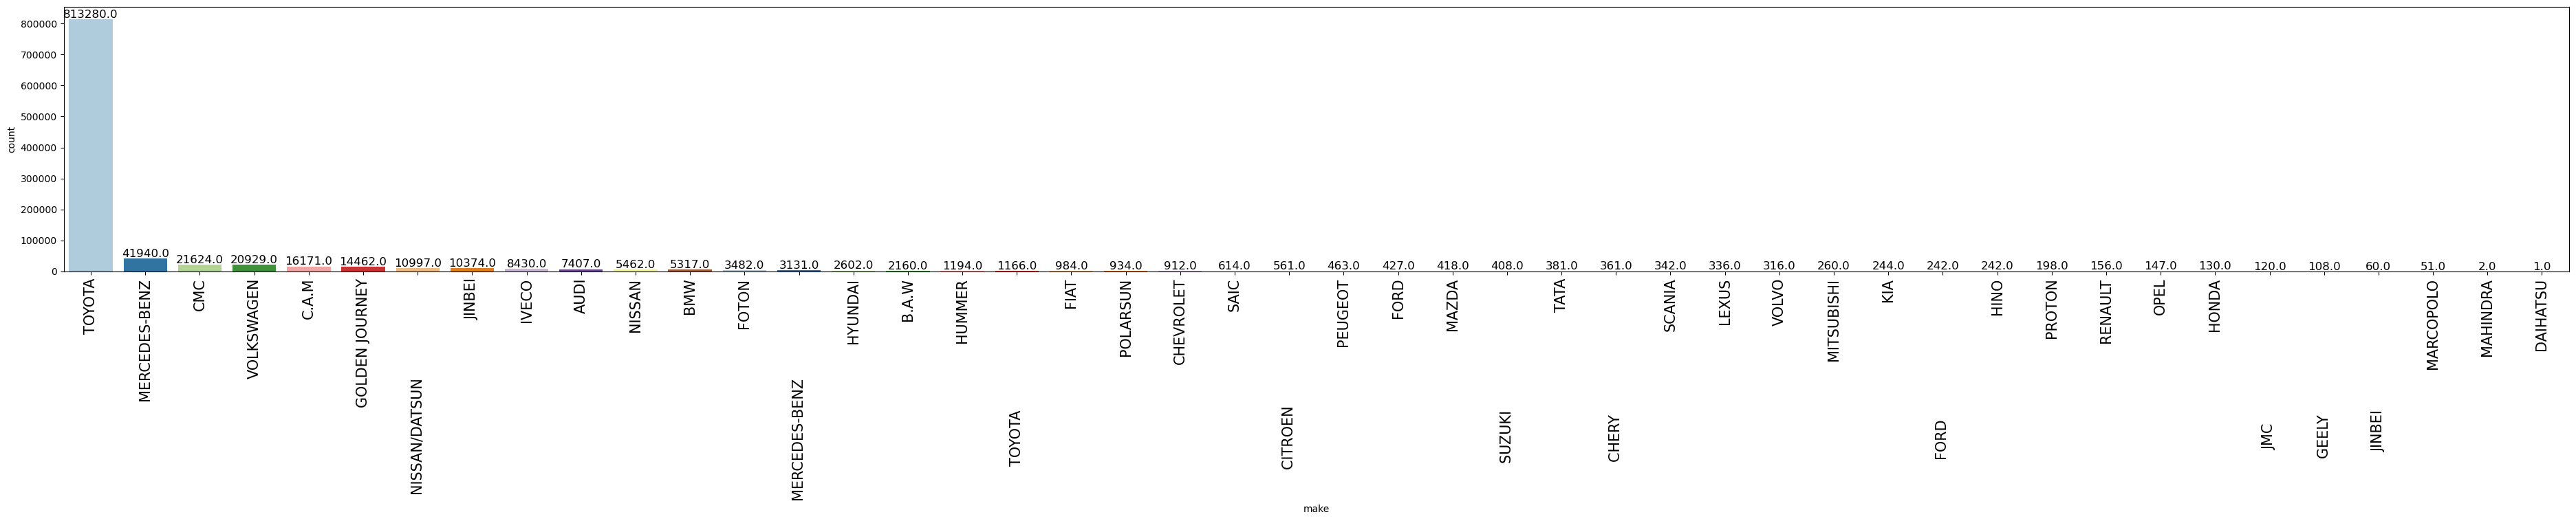

In [28]:
VATRegistered = categorical_plot.labeled_barplot('make')

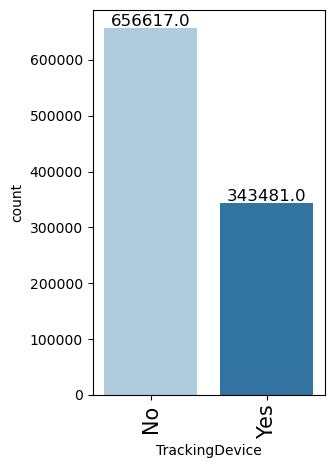

In [30]:
VATRegistered = categorical_plot.labeled_barplot('TrackingDevice')

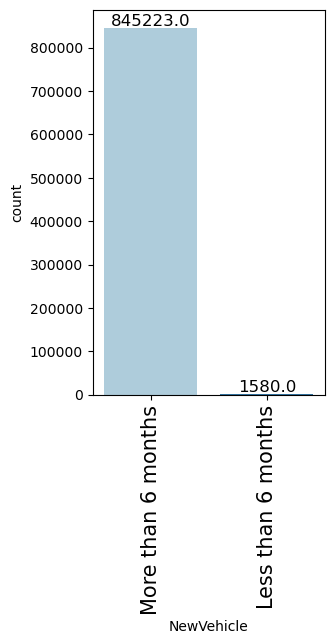

In [31]:
VATRegistered = categorical_plot.labeled_barplot('NewVehicle')

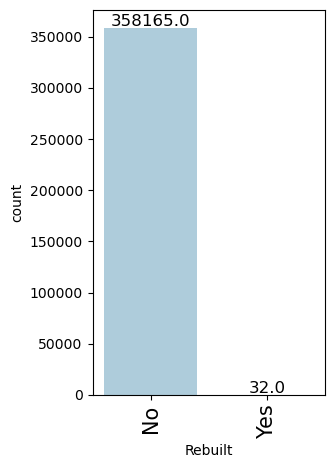

In [32]:
VATRegistered = categorical_plot.labeled_barplot('Rebuilt')

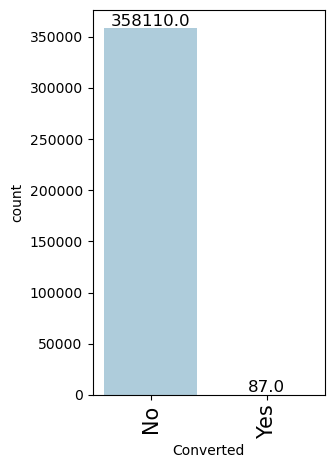

In [33]:
VATRegistered = categorical_plot.labeled_barplot('Converted')

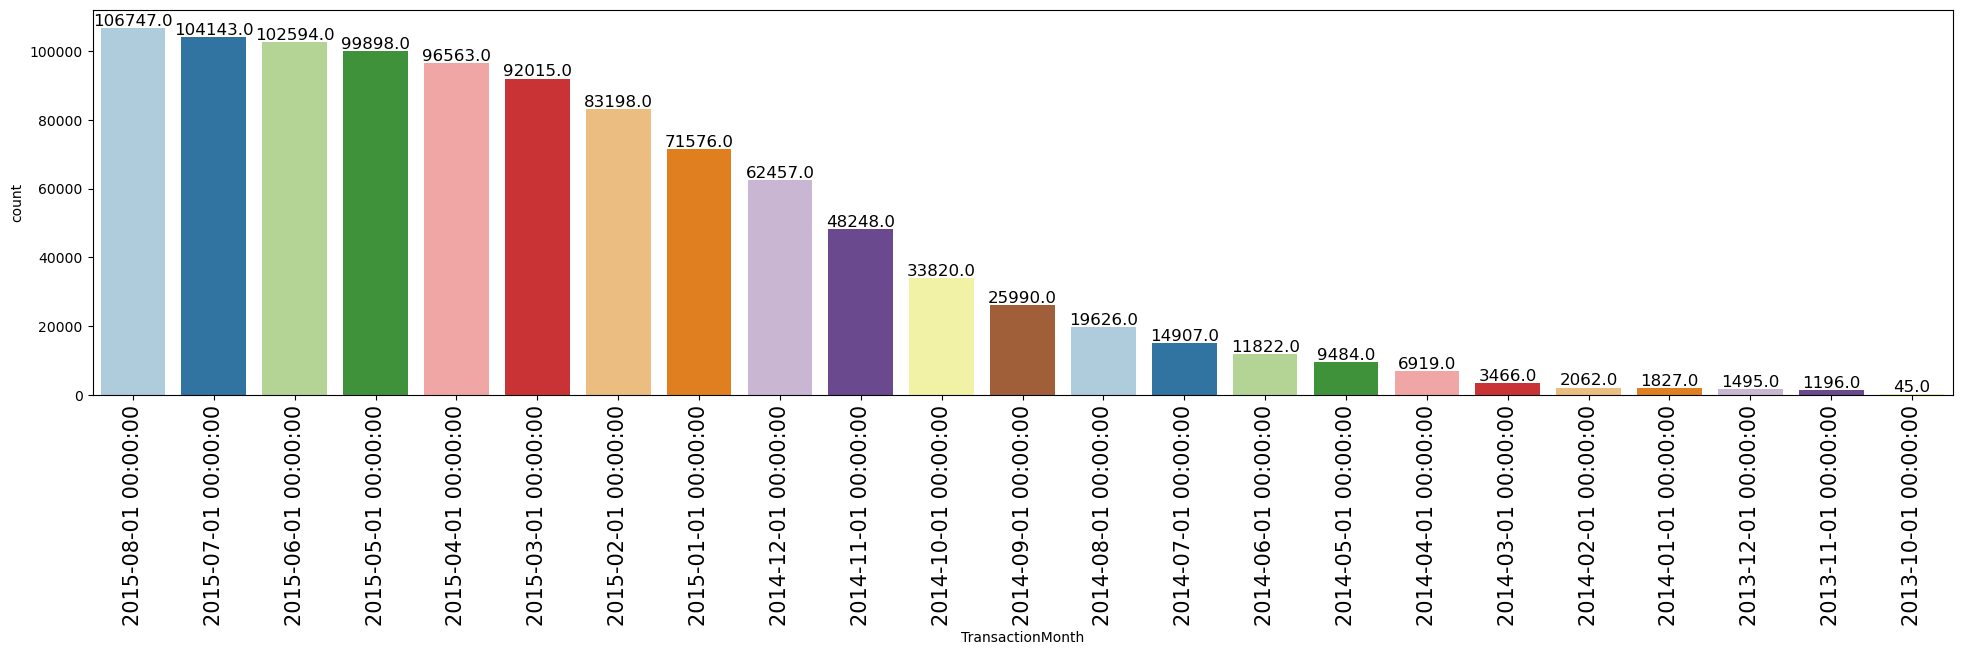

In [38]:
VATRegistered = categorical_plot.labeled_barplot('TransactionMonth')

In [15]:
Numerical_plot = visualizer(df1)

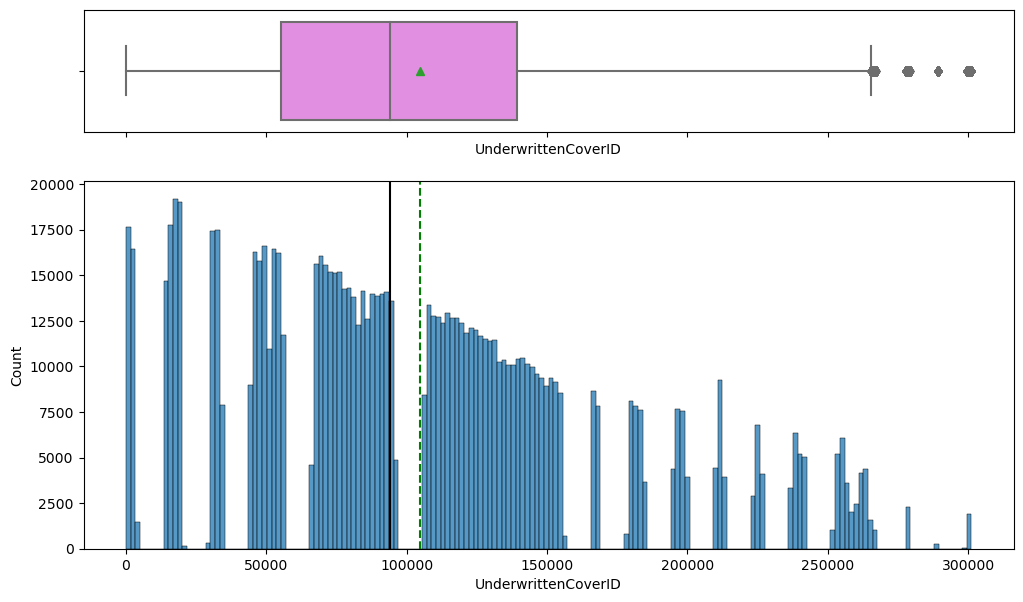

In [16]:
VATRegistered = Numerical_plot.histogram_boxplot('UnderwrittenCoverID')

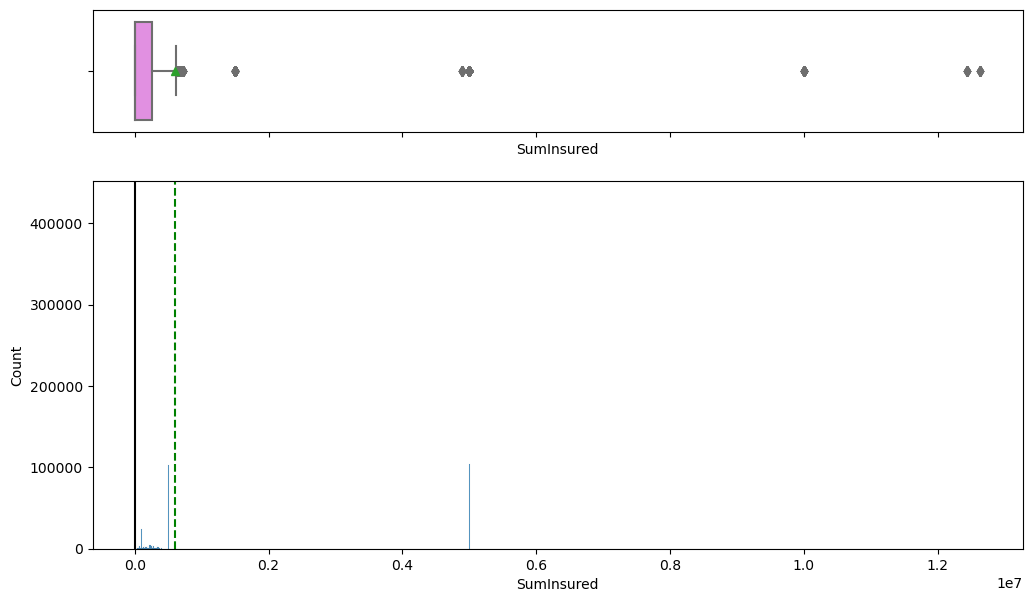

In [44]:
VATRegistered = Numerical_plot.histogram_boxplot('SumInsured')

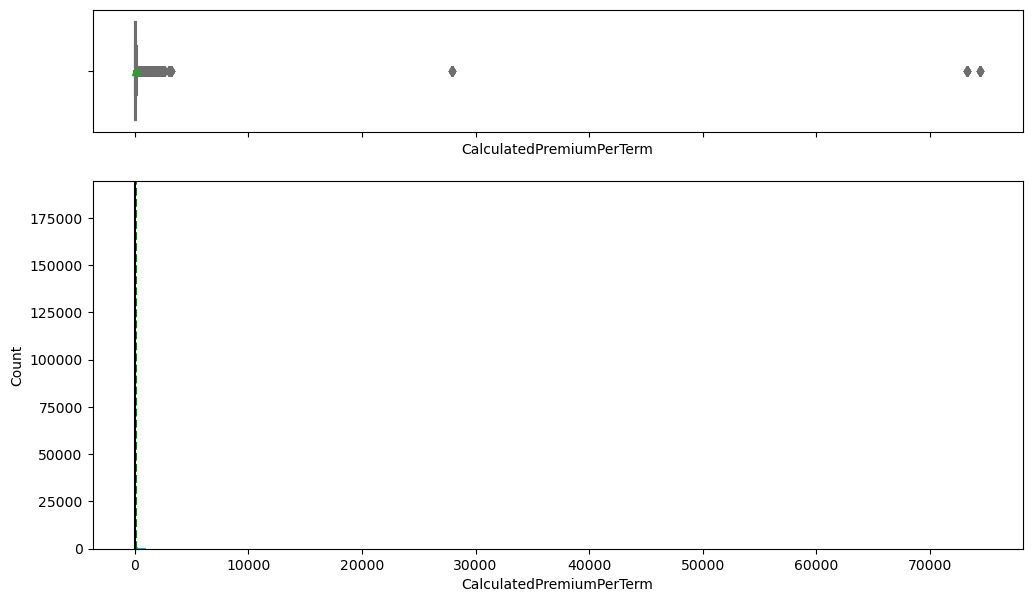

In [ ]:
VATRegistered = Numerical_plot.histogram_boxplot('CalculatedPremiumPerTerm')

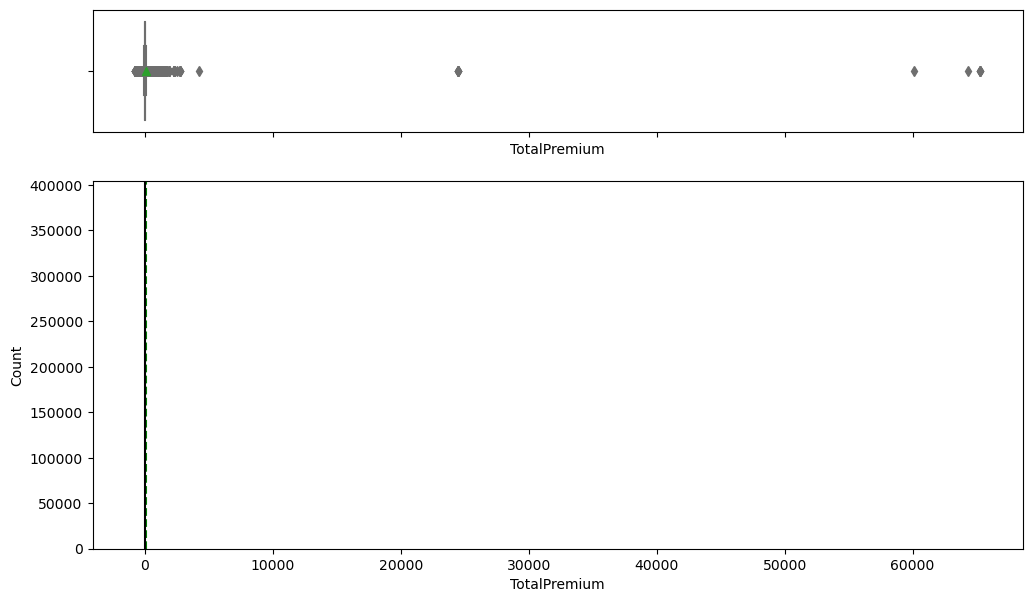

In [46]:
VATRegistered = Numerical_plot.histogram_boxplot('TotalPremium')

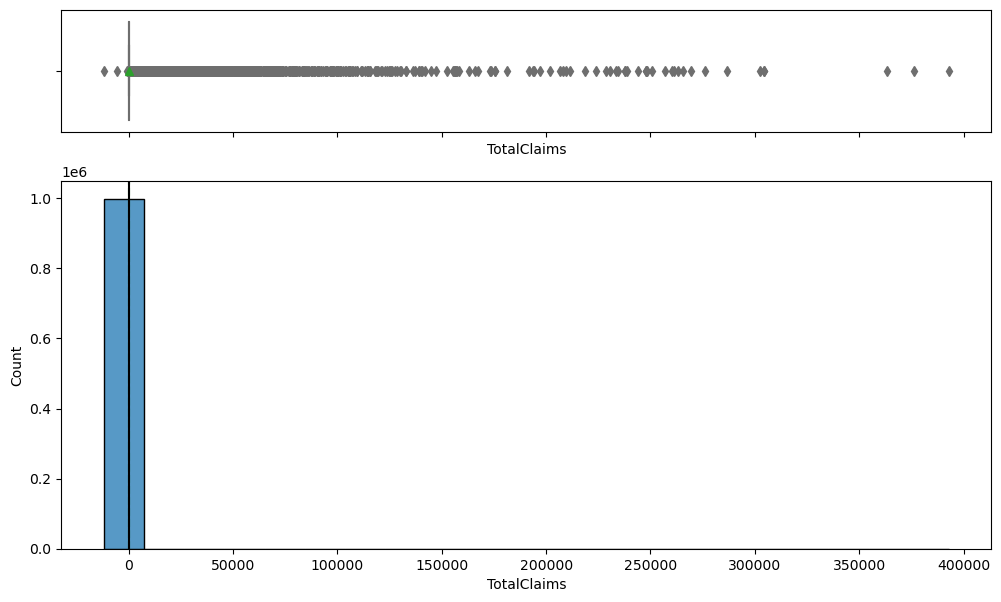

In [47]:
VATRegistered = Numerical_plot.histogram_boxplot('TotalClaims')

In [17]:
# Convert PostalCode to categorical if it's not numeric
#df['PostalCode'] = df['PostalCode'].astype(str)

# Compute correlation between TotalPremium and TotalClaims
correlation_matrix = df1[['TotalPremium', 'TotalClaims']].corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
               TotalPremium  TotalClaims
TotalPremium      1.000000     0.121588
TotalClaims       0.121588     1.000000


### Correlation Between TotalPremium and TotalClaims (0.121588)

The correlation coefficient of 0.1216 suggests a weak positive relationship between TotalPremium and TotalClaims.
This means that as TotalPremium increases, TotalClaims tends to increase slightly, but the relationship is not strong.
Since the correlation is close to 0 (but positive), there is some association but not a clear linear dependency.

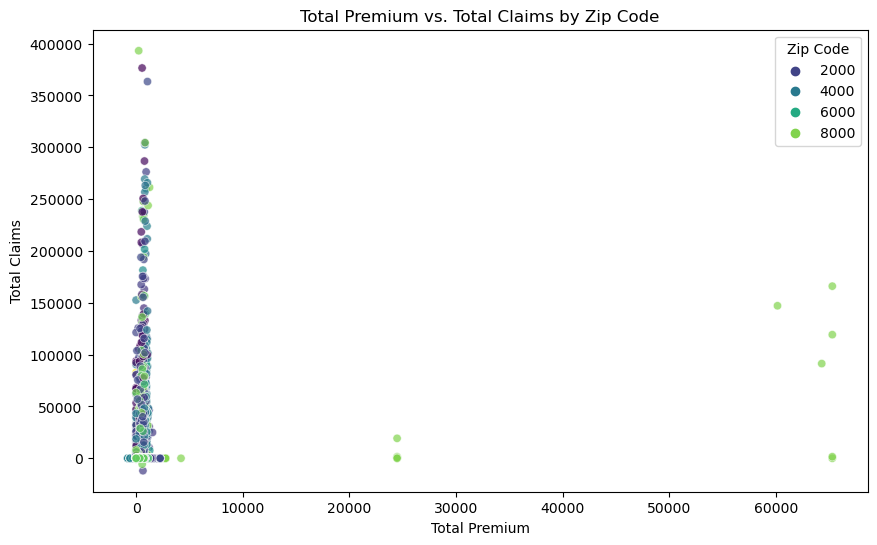

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
# Scatter plot of TotalPremium vs. TotalClaims colored by Zip Code
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='TotalPremium', y='TotalClaims', hue='PostalCode', palette='viridis', alpha=0.7)
plt.title('Total Premium vs. Total Claims by Zip Code')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')
plt.legend(title='Zip Code', bbox_to_anchor=(1, 1))
plt.show()


### General Trend
The majority of data points are clustered near low Total Premium values (left side of the plot).
Some outliers exist at high Total Premium values but appear less frequent.
Total Claims are widely spread for lower Total Premiums but seem to have extreme values.

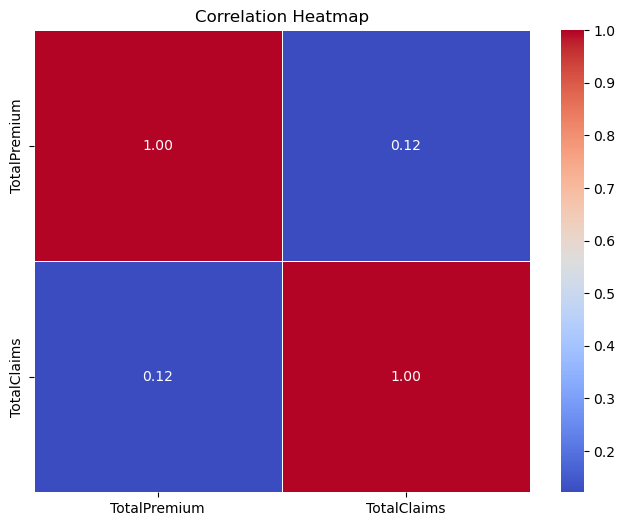

In [50]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Steps Covered:
Geographical Trends by Cover Type – Count of insurance cover types by Province

Premium Trends by Region – Average premium per region (PostalCode, Province)

Auto Make Trends by Geography – Distribution of vehicle makes across provinces

Visualization – Bar plots and heatmaps


In [5]:
Province = visualizer(df1)


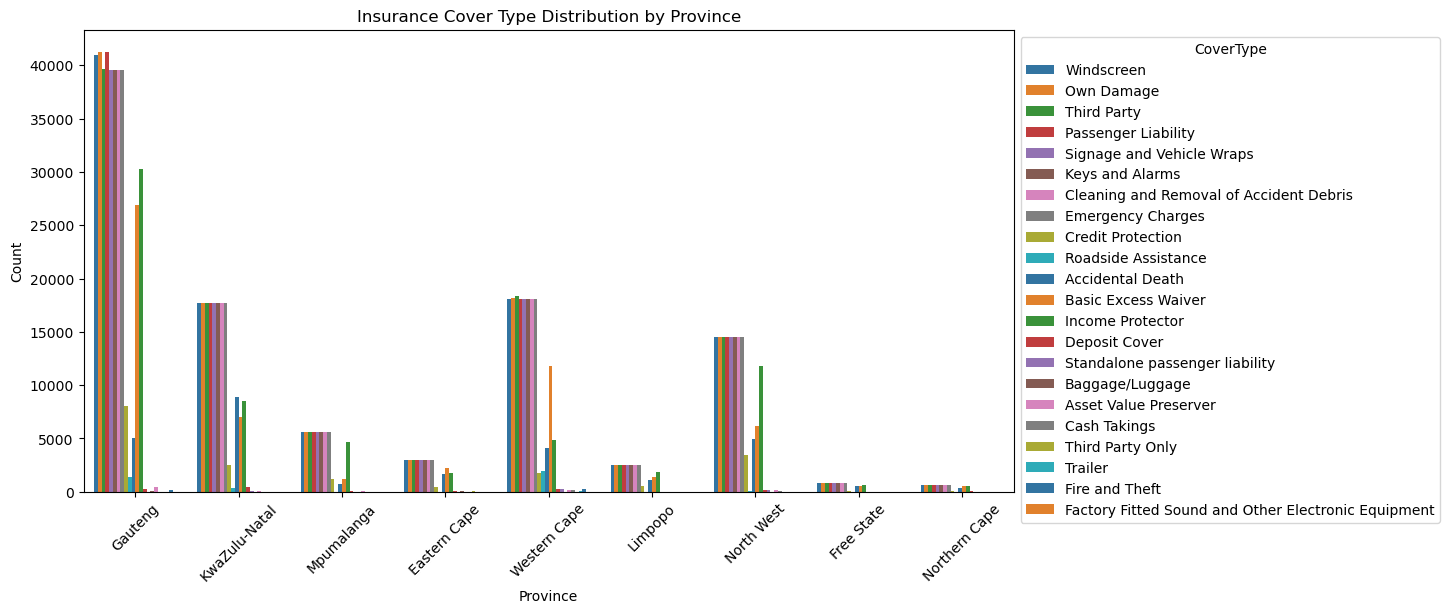

In [20]:
pro =  Province.plot_categorical_distribution('Province', 'CoverType', "Insurance Cover Type Distribution by Province", "Province", "Count")

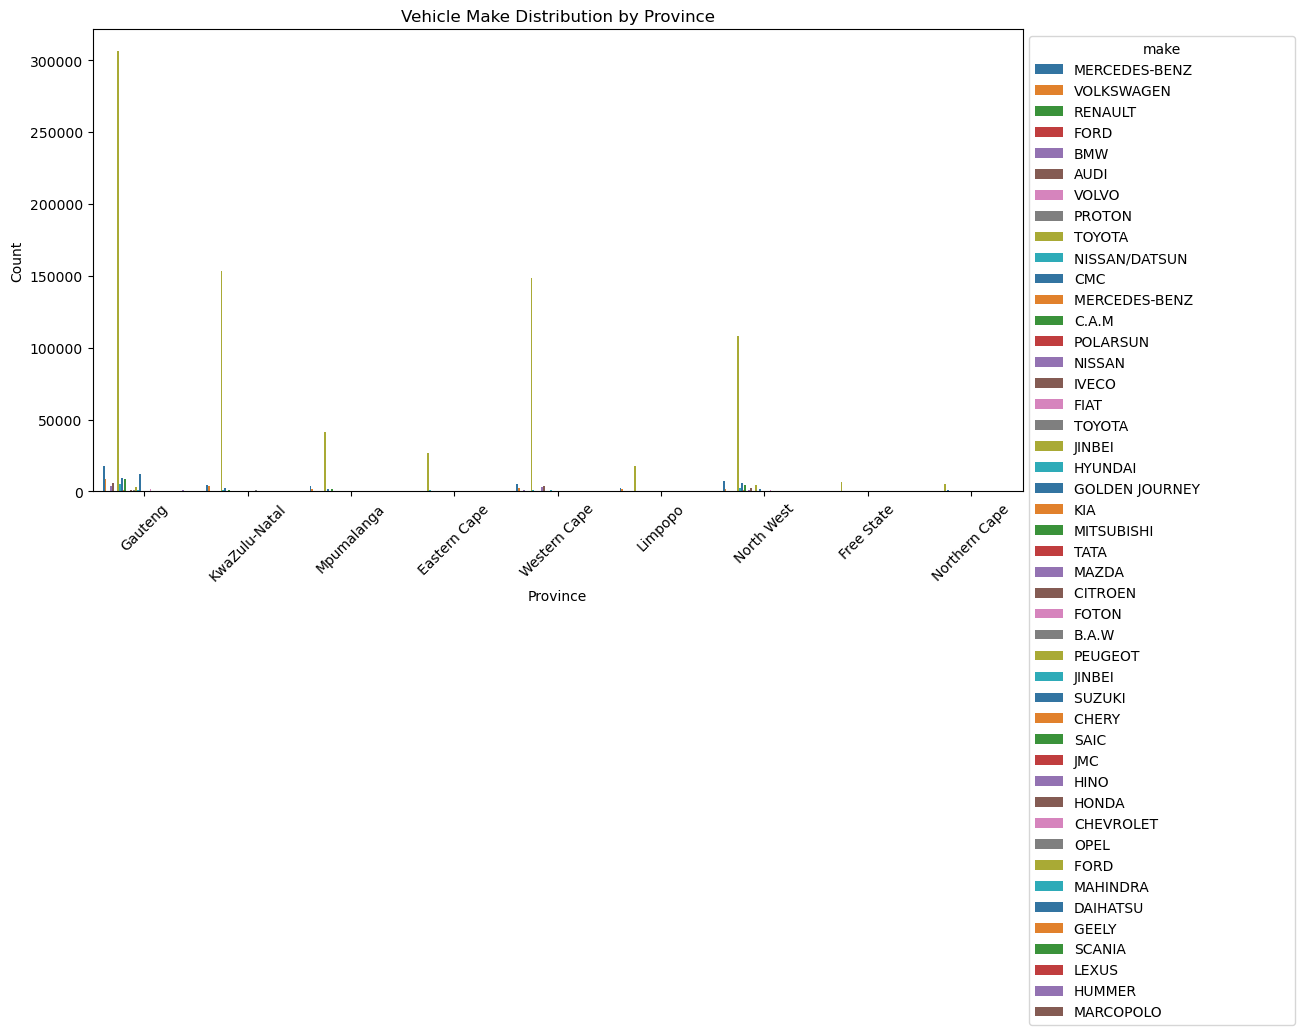

In [21]:
# 3️⃣ Distribution of Auto Makes by Province
Province.plot_categorical_distribution('Province', 'make', "Vehicle Make Distribution by Province", "Province", "Count")

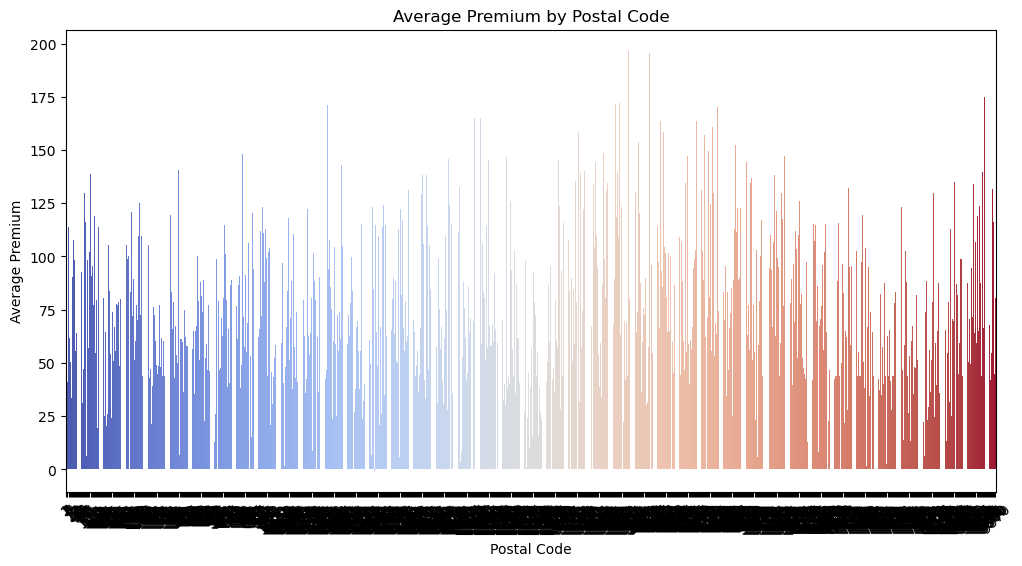

In [22]:
# 2️⃣ Average Premium per Postal Code
numer =Province.plot_numerical_distribution('PostalCode', 'TotalPremium', "Average Premium by Postal Code", "Postal Code", "Average Premium")

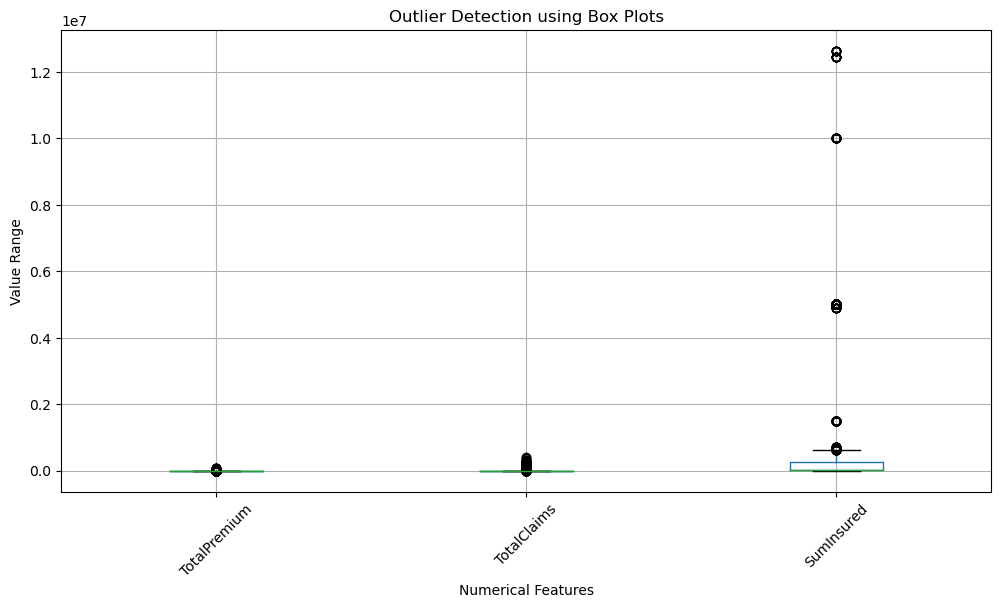

In [6]:
 # 4️⃣ Outlier Detection
numeric_columns = ['TotalPremium', 'TotalClaims', 'SumInsured']  # Update with actual numeric columns
outlier =Province.plot_outlier_detection(numeric_columns)

## Visualization
■	Produce 3 creative and beautiful plots that capture the key insight you gained from your EDA


In [3]:
visualize = visualizer(df1)

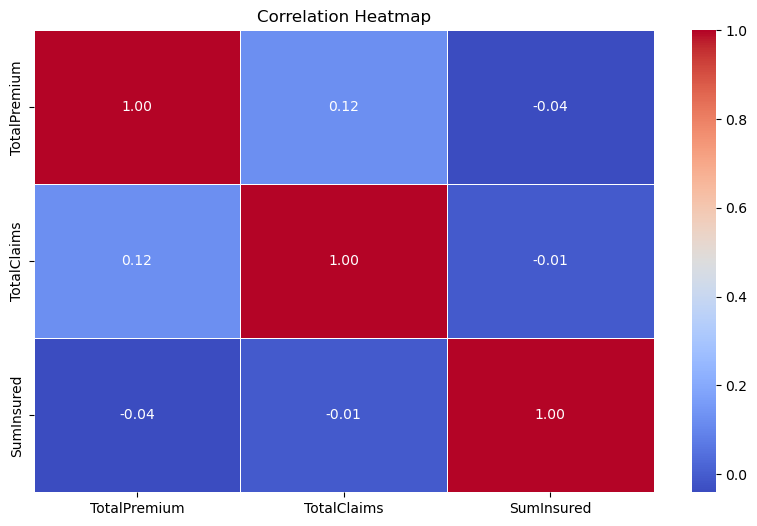

In [9]:
corre = visualize.plot_correlation_heatmap(numeric_columns)

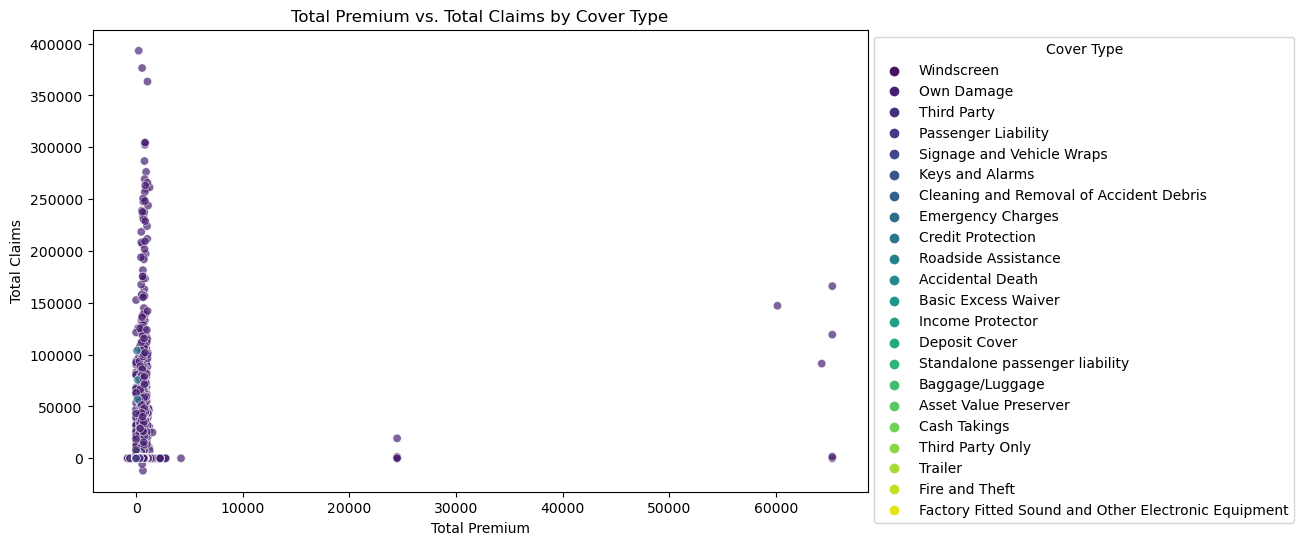

In [6]:
# 6️⃣ Total Premium vs. Total Claims
prevs_claims =visualize.plot_premium_vs_claims()

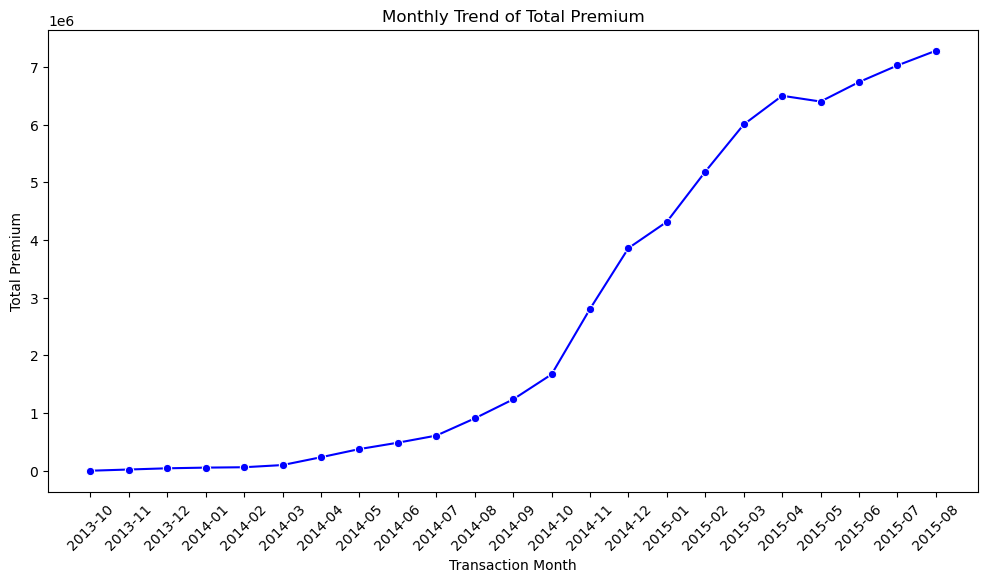

In [4]:
# 7️⃣ Monthly Trend of Total Premium
premium_trend = visualize.plot_premium_trend()

## A/B Hypothesis Testing

### 1. Null Hypothesis: There are no risk differences across provinces

In [4]:
modelling = model_development(df1)

In [5]:
modelling.preprocessing()

                          Missing Count Missing Percentage
UnderwrittenCoverID                   0             0.00 %
PolicyID                              0             0.00 %
TransactionMonth                      0             0.00 %
IsVATRegistered                       0             0.00 %
Citizenship                           0             0.00 %
LegalType                             0             0.00 %
Title                                 0             0.00 %
Language                              0             0.00 %
Bank                             145961            14.59 %
AccountType                       40232             4.02 %
MaritalStatus                      8259             0.83 %
Gender                             9536             0.95 %
Country                               0             0.00 %
Province                              0             0.00 %
PostalCode                            0             0.00 %
MainCrestaZone                        0             0.00

In [6]:
# Removing missing columns that have almost 100% missings from the data 
df1 = df1.drop(['CrossBorder', 'NumberOfVehiclesInFleet'],axis=1)

In [8]:
numerical_data = df1.select_dtypes(include=['number'])
numerical_data

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
0,145249,12827,1459,44069150.0,2004,6.0,2597.0,130.0,4.0,119300.0,0.01,25.0000,21.929825,0.0
1,145249,12827,1459,44069150.0,2004,6.0,2597.0,130.0,4.0,119300.0,0.01,25.0000,21.929825,0.0
2,145249,12827,1459,44069150.0,2004,6.0,2597.0,130.0,4.0,119300.0,0.01,25.0000,0.000000,0.0
3,145255,12827,1459,44069150.0,2004,6.0,2597.0,130.0,4.0,119300.0,119300.00,584.6468,512.848070,0.0
4,145255,12827,1459,44069150.0,2004,6.0,2597.0,130.0,4.0,119300.0,119300.00,584.6468,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,7493,4614100.0,2013,4.0,2693.0,110.0,4.0,NaN,500000.00,395.8481,347.235175,0.0
1000094,31520,389,7493,4614100.0,2013,4.0,2693.0,110.0,4.0,NaN,500000.00,395.8481,347.235175,0.0
1000095,31520,389,7493,4614100.0,2013,4.0,2693.0,110.0,4.0,NaN,500000.00,395.8481,347.235175,0.0
1000096,31519,389,7493,4614100.0,2013,4.0,2693.0,110.0,4.0,NaN,5000000.00,2.6391,2.315000,0.0


In [ ]:
# Removing Null values from 'kilowatts' columns, b/c null values in this columns are null in other columns too.
df1 = df1.dropna(subset='kilowatts')

In [26]:
df1.isnull().sum()


UnderwrittenCoverID              0
PolicyID                         0
TransactionMonth                 0
IsVATRegistered                  0
Citizenship                      0
LegalType                        0
Title                            0
Language                         0
Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
Country                          0
Province                         0
PostalCode                       0
MainCrestaZone                   0
SubCrestaZone                    0
ItemType                         0
mmcode                           0
VehicleType                      0
RegistrationYear                 0
make                             0
Model                            0
Cylinders                        0
cubiccapacity                    0
kilowatts                        0
bodytype                         0
NumberOfDoors                    0
VehicleIntroDate    

In [11]:
categoric_data = df1.select_dtypes(exclude=['number'])
categoric_data

,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,...,Converted,TermFrequency,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType
0,3/1/2015 0:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,...,NaN,Monthly,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant
1,5/1/2015 0:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,...,NaN,Monthly,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant
2,7/1/2015 0:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,...,NaN,Monthly,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant
3,5/1/2015 0:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,...,NaN,Monthly,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant
4,7/1/2015 0:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,...,NaN,Monthly,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,4/1/2015 0:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,Single,Male,...,No,Monthly,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant
1000094,6/1/2015 0:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,Single,Male,...,No,Monthly,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant
1000095,8/1/2015 0:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,Single,Male,...,No,Monthly,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant
1000096,7/1/2014 0:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,Single,Male,...,No,Monthly,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant
